# Proyecto Sprint 10

##  Acceda los datos y prepáralos para el análisis

In [36]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Leemos los conjuntos de datos en varios DataFrames
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', delimiter = ';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### DataFrame "Hipotesis"

**Estadística Descriptiva**

In [3]:
# Imprimimos la estadística descriptiva del df "HIPOTESIS"
print("DATAFRAME HIPOTESIS")
print(hipotesis.head())
print("----------------------------------------------------------------")
print(hipotesis.info())
print("----------------------------------------------------------------")
print(hipotesis.describe())

DATAFRAME HIPOTESIS
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4  

**Tipos de datos**

In [4]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(hipotesis.dtypes)

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object


In [5]:
# Convertimos las columnas a sus tipos de datos correspondientes
hipotesis['Hypothesis'] = hipotesis['Hypothesis'].astype('string')

In [6]:
# Revisamos que los tipos de datos se hayan cambiado correctamente
print(hipotesis.dtypes)

Hypothesis    string
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object


**Datos Ausentes**

In [7]:
# Revisamos y eliminamos duplicados
print(hipotesis.isnull().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


No hay duplicados por lo que podemos comenzar con el análisis

### DataFrame "Orders"

**Estadística Descriptiva**

In [8]:
# Imprimimos la estadística descriptiva del df "ORDERS"
print("DATAFRAME ORDERS")
print(orders.head())
print("----------------------------------------------------------------")
print(orders.info())
print("----------------------------------------------------------------")
print(orders.describe())
print("----------------------------------------------------------------")

DATAFRAME ORDERS
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
----------------------------------------------------------------
       transactionId     visitorId 

**Tipos de datos**

In [9]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(orders.dtypes)

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object


In [10]:
# Convertimos las columnas a sus tipos de datos correspondientes
orders['date'] = pd.to_datetime(orders['date'])
orders['group'] = orders['group'].astype('string')

In [11]:
# Revisamos que los tipos de datos se hayan cambiado correctamente
print(orders.dtypes)

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    string
dtype: object


**Datos Ausentes**

In [12]:
# Revisamos y eliminamos duplicados
print(orders.isnull().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


No hay duplicados por lo que podemos comenzar con el análisis

### DataFrame "Visits"

**Estadística Descriptiva**

In [13]:
# Imprimimos la estadística descriptiva del df "VISITS"
print("DATAFRAME VISITS")
print(visits.head())
print("----------------------------------------------------------------")
print(visits.info())
print("----------------------------------------------------------------")
print(visits.describe())

DATAFRAME VISITS
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
----------------------------------------------------------------
           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


**Tipos de datos**

In [14]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(visits.dtypes)

date      object
group     object
visits     int64
dtype: object


In [15]:
# Convertimos las columnas a sus tipos de datos correspondientes
visits['date'] = pd.to_datetime(visits['date'])
visits['group'] = visits['group'].astype('string')

In [16]:
# Revisamos que los tipos de datos se hayan cambiado correctamente
print(visits.dtypes)

date      datetime64[ns]
group             string
visits             int64
dtype: object


**Datos Ausentes**

In [17]:
# Revisamos y eliminamos duplicados
print(visits.isnull().sum())

date      0
group     0
visits    0
dtype: int64


No hay duplicados por lo que podemos comenzar con el análisis

# Parte 1. Priorizar hipótesis

**Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.**

In [19]:
# Calcular el puntaje ICE: ICE = (Impact * Confidence) / Effort
hipotesis['ICE'] = (hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

# Ordenar las hipótesis por puntaje ICE en orden descendente
ice_sorted = hipotesis.sort_values(by='ICE', ascending=False)

# Mostrar las hipótesis ordenadas por ICE
print("Orden por ICE:")
print(ice_sorted[['Hypothesis', 'ICE']])

Orden por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


**Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.**

In [22]:
# Calcular el puntaje RICE: RICE = (Reach * Impact * Confidence) / Effort
hipotesis['RICE'] = (hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

# Ordenar las hipótesis por puntaje RICE en orden descendente
rice_sorted = hipotesis.sort_values(by='RICE', ascending=False)

# Mostrar las hipótesis ordenadas por RICE
print("\nOrden por RICE:")
print(rice_sorted[['Hypothesis', 'RICE']])


Orden por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


**Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.**

In [24]:
# Comparar el orden de las hipótesis en ICE vs RICE

comparison = pd.DataFrame({
    'Hypothesis': hipotesis['Hypothesis'],
    'ICE_Rank': hipotesis['ICE'].rank(ascending=False),
    'RICE_Rank': hipotesis['RICE'].rank(ascending=False)
})

comparison['Rank_Change'] = comparison['ICE_Rank'] - comparison['RICE_Rank']

# Mostrar comparación
print("\nComparación de Rankings:")
print(comparison.sort_values(by='RICE_Rank'))


Comparación de Rankings:
                                          Hypothesis  ICE_Rank  RICE_Rank  \
7  Add a subscription form to all the main pages....       3.0        1.0   
2  Add product recommendation blocks to the store...       5.0        2.0   
0  Add two new channels for attracting traffic. T...       2.0        3.5   
6  Show banners with current offers and sales on ...       4.0        3.5   
8  Launch a promotion that gives users discounts ...       1.0        5.0   
3  Change the category structure. This will incre...       8.0        6.0   
1  Launch your own delivery service. This will sh...       6.0        7.5   
5  Add a customer review page. This will increase...       7.0        7.5   
4  Change the background color on the main page. ...       9.0        9.0   

   Rank_Change  
7          2.0  
2          3.0  
0         -1.5  
6          0.5  
8         -4.0  
3          2.0  
1         -1.5  
5         -0.5  
4          0.0  


**Explicación de los cambios:**

**1. Hipótesis con cambios:**

La hipótesis "Add a subscription form to all the main pages" sube del puesto 3 al 1 porque afecta a muchos usuarios (alto Reach), haciéndola más prioritaria en RICE.

La hipótesis "Add product recommendation blocks to the store" mejora del puesto 5 al 2, debido a un mayor impacto en los usuarios, favorecido por su alcance.

La hipótesis "Launch a promotion that gives users discounts" baja del puesto 1 al 5, ya que aunque es efectiva, tiene un alcance más limitado en comparación con otras hipótesis.


**2. Hipótesis sin cambios:**

La hipótesis "Change the background color on the main page" mantiene el puesto 9 en ambos rankings, ya que tiene un impacto muy bajo y un alcance limitado.

**3. Conclusión:**

El uso de RICE permite priorizar mejor las hipótesis con mayor alcance, resaltando aquellas que podrían generar un impacto más amplio en los ingresos. Esto es útil cuando el objetivo es maximizar resultados a nivel global, mientras que ICE es más adecuado para evaluar ideas sin considerar el tamaño de la audiencia afectada.

# Parte 2. Análisis del test A/B

**1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.**

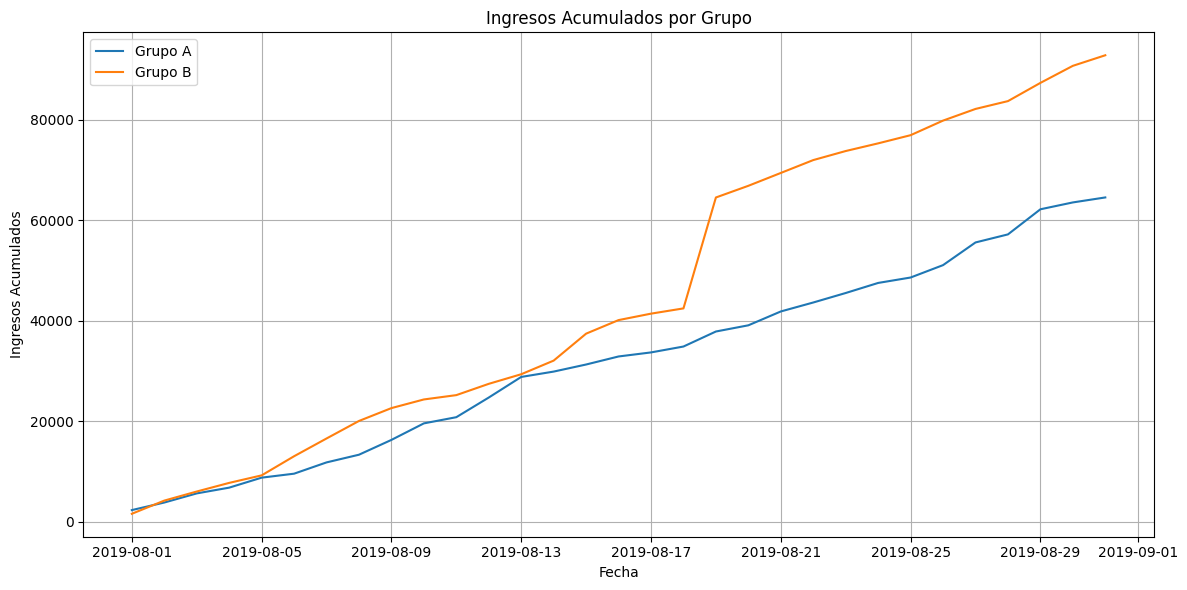

In [26]:
# Agrupar por fecha y grupo para calcular los ingresos acumulados
cumulative_revenue = (orders.groupby(['date', 'group'])
                      .agg({'revenue': 'sum'})
                      .groupby(level=1)
                      .cumsum()
                      .reset_index())

# Graficar los ingresos acumulados por grupo
plt.figure(figsize=(12, 6))
for group in cumulative_revenue['group'].unique():
    group_data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['revenue'], label=f'Grupo {group}')

plt.title('Ingresos Acumulados por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos Acumulados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusiones y conjeturas**

Podemos ver en la gráfica que el grupo B tiene ingresos acumulados más altos que el grupo A, con un aumento notable desde el 17 de agosto, lo que sugiere una mejora en el rendimiento o la influencia de valores atípicos. Además, ambos grupos muestran un crecimiento positivo, pero el grupo B tiene un crecimiento más pronunciado.

Desde un inicio, ambos grupos crecen de manera similar, pero el grupo B se separa significativamente del grupo A, lo que podría indicar una diferencia en la efectividad de las estrategias del test A/B.

Conjeturas: El grupo B podría haber tenido una estrategia más efectiva, impactado por valores atípicos o una segmentación de clientes diferente, y sería necesario evaluar si el mejor desempeño se mantiene o fue temporal.

**2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas**

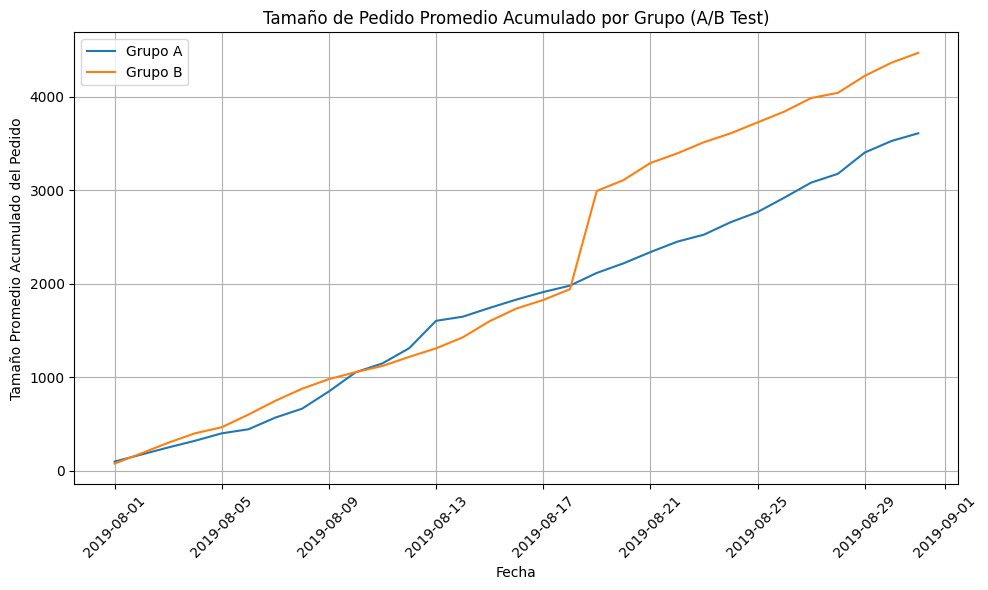

In [27]:
# Calcular los ingresos acumulados por grupo y fecha
orders_grouped = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Calcular el número de pedidos por grupo y fecha
orders_count = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()

# Unir ambos dataframes para obtener la información completa
merged_data = pd.merge(orders_grouped, orders_count, on=['date', 'group'], how='left')
merged_data['avg_order_size'] = merged_data['revenue'] / merged_data['transactionId']

# Calcular los totales acumulados
merged_data['cumulative_avg_order_size'] = merged_data.groupby('group')['avg_order_size'].cumsum()

# Graficar el tamaño de pedido promedio acumulado por grupo
plt.figure(figsize=(10, 6))
for group in merged_data['group'].unique():
    group_data = merged_data[merged_data['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order_size'], label=f'Grupo {group}')

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo (A/B Test)')
plt.xlabel('Fecha')
plt.ylabel('Tamaño Promedio Acumulado del Pedido')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones y conjeturas**

Derivado de la gráfica, podemos ver que el Grupo B supera al A, dado que el tamaño promedio de pedido acumulado del grupo B es consistentemente mayor, con un aumento significativo alrededor del 20 de agosto.
Por otro lado podemos ver que el grupo A es más estable por lo que crece de forma gradual y sin grandes cambios.
El pico en el grupo B podría deberse a promociones u otros factores externos. Las estrategias en el grupo B parecen más efectivas, pero se debe investigar la sostenibilidad de este crecimiento.

**3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

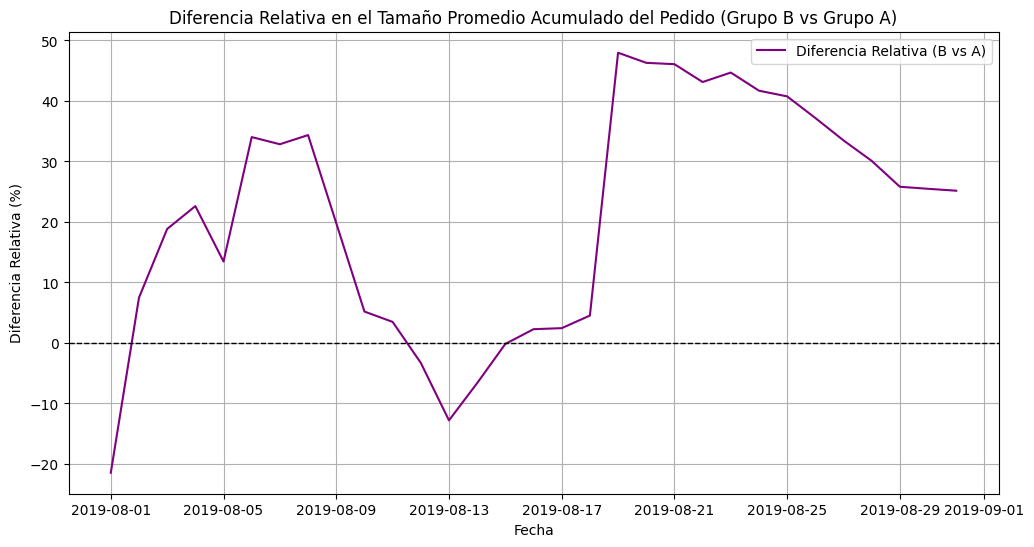

In [28]:
# Calcular ingresos acumulados y transacciones acumuladas por grupo y fecha
orders_grouped = (
    orders.groupby(['date', 'group'])
    .agg({'revenue': 'sum', 'transactionId': 'count'})
    .rename(columns={'transactionId': 'transactions'})
    .reset_index()
)

# Calcular métricas acumuladas
orders_grouped['cumulative_revenue'] = (
    orders_grouped.groupby('group')['revenue'].cumsum()
)
orders_grouped['cumulative_transactions'] = (
    orders_grouped.groupby('group')['transactions'].cumsum()
)

# Calcular el tamaño de pedido promedio acumulado
orders_grouped['cumulative_avg_order_size'] = (
    orders_grouped['cumulative_revenue'] / orders_grouped['cumulative_transactions']
)

# Filtrar por grupo
group_A = orders_grouped[orders_grouped['group'] == 'A']
group_B = orders_grouped[orders_grouped['group'] == 'B']

# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado
merged_data = pd.merge(
    group_A[['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'avg_A'}),
    group_B[['date', 'cumulative_avg_order_size']].rename(columns={'cumulative_avg_order_size': 'avg_B'}),
    on='date'
)

merged_data['relative_difference'] = (
    (merged_data['avg_B'] - merged_data['avg_A']) / merged_data['avg_A'] * 100
)

# Graficar la diferencia relativa
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['relative_difference'], label='Diferencia Relativa (B vs A)', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa (%)')
plt.title('Diferencia Relativa en el Tamaño Promedio Acumulado del Pedido (Grupo B vs Grupo A)')
plt.legend()
plt.grid()
plt.show()

**Conclusiones y conjeturas**

El tamaño promedio acumulado del grupo B supera al del grupo A en la mayor parte del período analizado (la diferencia en la maypr parte del tiempo está por arriba e 0).
Existen fluctuaciones notables en la diferencia relativa, con un aumento pronunciado alrededor del 20 de agosto.
Hacia el final del tiempo, el grupo B mantiene una ventaja de aproximadamente 30%.

Los cambios aplicados al grupo B parecen tener un impacto positivo. Además de que los picos abruptos podrían deberse a campañas o promociones específicas en el grupo B.

**4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.**

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

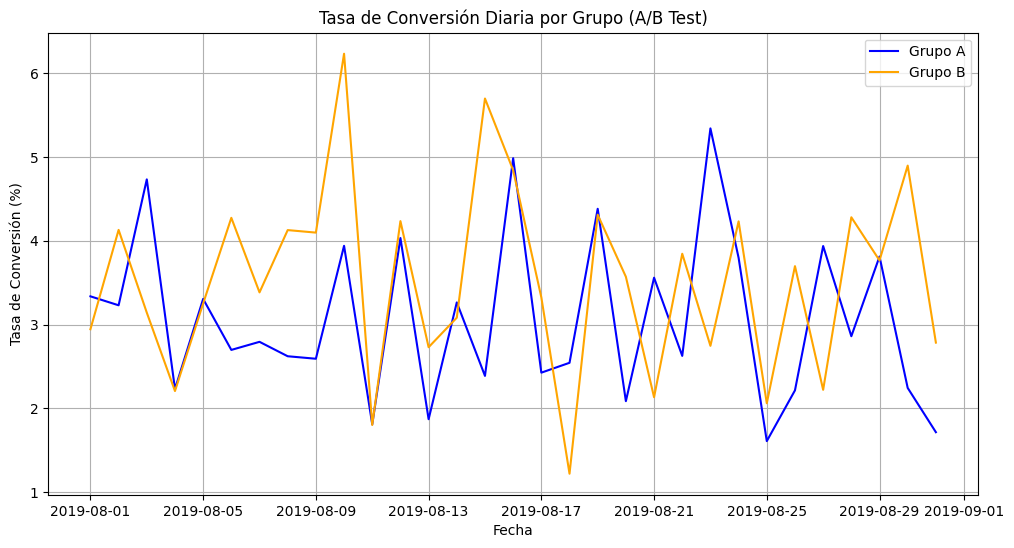

In [29]:
# Agrupar los datos de pedidos por fecha y grupo para calcular la cantidad de pedidos diarios
orders_daily = (
    orders.groupby(['date', 'group'])
    .agg({'transactionId': 'count'})
    .rename(columns={'transactionId': 'orders'})
    .reset_index()
)

# Unir los datos de pedidos diarios con los datos de visitas diarias
merged_visits_orders = pd.merge(
    visits, orders_daily, on=['date', 'group'], how='left'
)

# Reemplazar valores NaN en "orders" con 0 (casos donde no hubo pedidos ese día)
merged_visits_orders['orders'] = merged_visits_orders['orders'].fillna(0)

# Calcular la tasa de conversión
merged_visits_orders['conversion_rate'] = (
    merged_visits_orders['orders'] / merged_visits_orders['visits'] * 100
)

# Separar los datos por grupo
group_A_conversion = merged_visits_orders[merged_visits_orders['group'] == 'A']
group_B_conversion = merged_visits_orders[merged_visits_orders['group'] == 'B']

# Graficar las tasas de conversión diarias
plt.figure(figsize=(12, 6))
plt.plot(group_A_conversion['date'], group_A_conversion['conversion_rate'], label='Grupo A', color='blue')
plt.plot(group_B_conversion['date'], group_B_conversion['conversion_rate'], label='Grupo B', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de Conversión Diaria por Grupo (A/B Test)')
plt.legend()
plt.grid()
plt.show()

**Conclusiones y conjeturas**

En la gráfica podemos ver que las tasas de conversión de ambos grupos muestran alta variabilidad diaria, lo que puede estar relacionado con factores externos como promociones o patrones de tráfico.
Además, en varios puntos, el grupo B tiene una tasa de conversión diaria superior al grupo A, aunque no de forma consistente.
Ambos grupos también muestran tasas similares en gran parte del período analizado, lo que podría indicar que los cambios realizados en el grupo B no generan una ventaja significativa en la conversión.

**5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.**

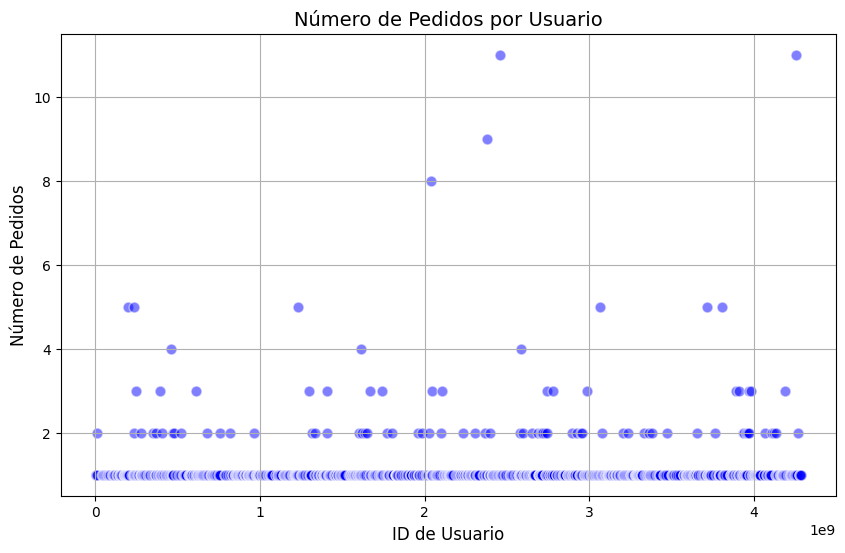

In [31]:
# Contar el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId').size()

# Traza el gráfico de dispersión del número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user.index, orders_per_user.values, alpha=0.5, c='blue', edgecolors='w', s=60)
plt.title('Número de Pedidos por Usuario', fontsize=14)
plt.xlabel('ID de Usuario', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.grid(True)
plt.show()


**Conclusiones y conjeturas**

De la gráfica podemos ver que la grán mayoría de los usuarios realizaron un solo pedido a lo largo de los meses. Además, se puede ver un comportamiento de pirámide; es decir, entre mayor son los pedidos, menor es la cantidad de usuarios que lo piden. Esto se ve debido a que solo 2 usuarios pidieron 10 o más pedidos a lo largo del tiempo. 

**6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.**

Percentil 95: 2.0
Percentil 99: 4.0
Umbral para anomalías: 4.0
Usuarios con anomalías (más pedidos que el percentil 99):
visitorId
199603092      5
237748145      5
1230306981     5
2038680547     8
2378935119     9
2458001652    11
3062433592     5
3717692402     5
3803269165     5
4256040402    11
dtype: int64


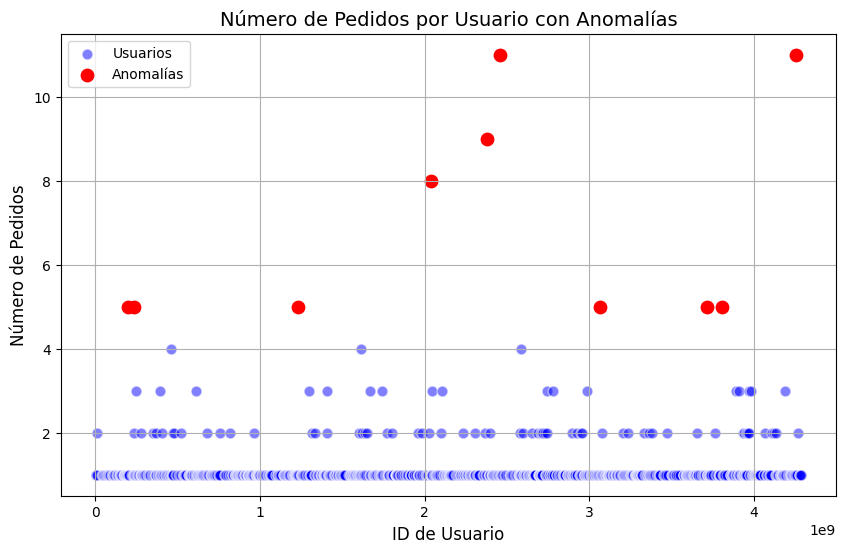

In [32]:
# Calcular los percentiles 95 y 99 del número de pedidos por usuario
percentil_95 = orders_per_user.quantile(0.95)
percentil_99 = orders_per_user.quantile(0.99)

# Definir el umbral de anomalías (por ejemplo, puntos de datos mayores al percentil 99)
umbral_anomalia = percentil_99

# Filtrar los usuarios que tienen un número de pedidos por encima del umbral
anomalias = orders_per_user[orders_per_user > umbral_anomalia]

# Mostrar los resultados
print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")
print(f"Umbral para anomalías: {umbral_anomalia}")
print(f"Usuarios con anomalías (más pedidos que el percentil 99):\n{anomalias}")

# Traza el gráfico de dispersión con los puntos de anomalías resaltados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user.index, orders_per_user.values, alpha=0.5, c='blue', edgecolors='w', s=60, label='Usuarios')
plt.scatter(anomalias.index, anomalias.values, color='red', s=80, label='Anomalías')  # Resaltamos las anomalías
plt.title('Número de Pedidos por Usuario con Anomalías', fontsize=14)
plt.xlabel('ID de Usuario', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

**Conclusiones y conjeturas**

De esta gráfica podemos ver que en efecto la gran mayoría de los usuarios no piden más de 4 pedidos a lo largo del tiempo, lo que nos muestra que los que si pidieron 5 o más pedidos caerían en un rango de anomalías, debido a que no siguen el comportamiento que el 95% hace. En la gráfica se puede ver esta división en colores.

**7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.**

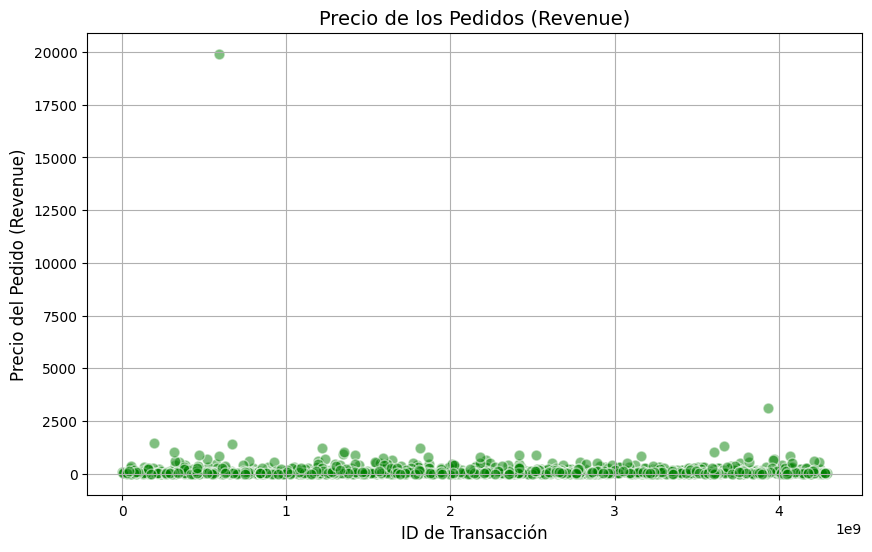

In [33]:
# Traza el gráfico de dispersión de los precios de los pedidos (revenue)
plt.figure(figsize=(10, 6))
plt.scatter(orders['transactionId'], orders['revenue'], alpha=0.5, c='green', edgecolors='w', s=60)
plt.title('Precio de los Pedidos (Revenue)', fontsize=14)
plt.xlabel('ID de Transacción', fontsize=12)
plt.ylabel('Precio del Pedido (Revenue)', fontsize=12)
plt.grid(True)
plt.show()


**Conclusiones y conjeturas**

De la gráfica podemos ver que el precio promedio ronda entre los $0 y $1,250 pesos a excepción de dos datos atípicos que rondan en los $3,000 y $20,000 pesos. A lo mejor estos precios tuvieron un pico inusual. A pesar de esto, el precio promedio se mantiene estable entre los rango antes mencionados.

**8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía**

Percentil 95: 435.54
Percentil 99: 900.9039999999999
Umbral para anomalías: 900.9039999999999
Pedidos con anomalías (precio mayor que el percentil 99):
      transactionId  revenue
425       590470918  19920.4
662      1811671147   1220.2
682      1216533772   1220.2
743      3603576309   1050.0
744      3668308183   1335.6
858       192721366   1450.2
940      2420050534    905.8
949      1347999392    930.0
1099      316924019   1015.9
1103     1348774318   1025.8
1136      666610489   1425.8
1196     3936777065   3120.1


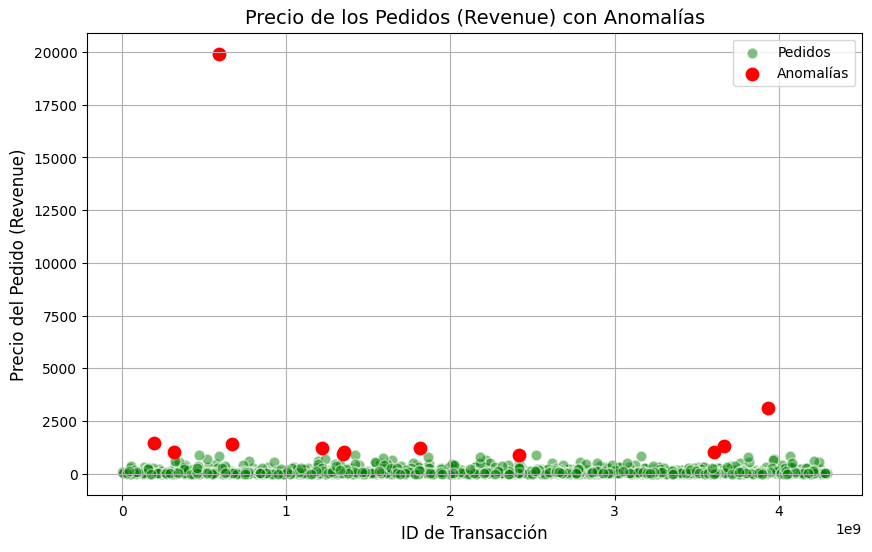

In [34]:
# Calcular los percentiles 95 y 99 de los precios de los pedidos
percentil_95 = orders['revenue'].quantile(0.95)
percentil_99 = orders['revenue'].quantile(0.99)

# Definir el umbral para anomalías (precios mayores que el percentil 99)
umbral_anomalia = percentil_99

# Filtrar los pedidos que tienen un precio mayor que el umbral (anomalías)
anomalias = orders[orders['revenue'] > umbral_anomalia]

# Mostrar los resultados
print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")
print(f"Umbral para anomalías: {umbral_anomalia}")
print(f"Pedidos con anomalías (precio mayor que el percentil 99):\n{anomalias[['transactionId', 'revenue']]}")

# Traza el gráfico de dispersión resaltando las anomalías
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(orders['transactionId'], orders['revenue'], alpha=0.5, c='green', edgecolors='w', s=60, label='Pedidos')
plt.scatter(anomalias['transactionId'], anomalias['revenue'], color='red', s=80, label='Anomalías')  # Resaltamos las anomalías
plt.title('Precio de los Pedidos (Revenue) con Anomalías', fontsize=14)
plt.xlabel('ID de Transacción', fontsize=12)
plt.ylabel('Precio del Pedido (Revenue)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

**Conclusiones y conjeturas**

Como mencioné anteriormente, se ven que hay rangos atíticos en cuanto al precio promedio, donde en efecto los dos puntos que mencioné caen dentro de la anomalía, pero también otros puntos más, que viendolo bien, recaen por arriba de los $1,250 pesos. Todos los precios restantes recaen entre el rango antes mencionado por lo que no se considerarían anomalías.

**9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [37]:
# Calcular el número de usuarios que hicieron pedidos por grupo
orders_grouped = orders.groupby('group')['visitorId'].nunique()

# Calcular el número de usuarios que visitaron el sitio por grupo
visits_grouped = visits.groupby('group')['visits'].sum()

# Calcular la tasa de conversión por grupo
conversion_rate_a = orders_grouped['A'] / visits_grouped['A']
conversion_rate_b = orders_grouped['B'] / visits_grouped['B']

# Mostrar las tasas de conversión
print(f"Tasa de conversión grupo A: {conversion_rate_a:.4f}")
print(f"Tasa de conversión grupo B: {conversion_rate_b:.4f}")

# Realizar un test de z para comparar las tasas de conversión de los dos grupos
# Numerador: número de éxitos (pedidos), denominador: número de intentos (visitas)
successes = [orders_grouped['A'], orders_grouped['B']]
trials = [visits_grouped['A'], visits_grouped['B']]

z_stat, p_value = proportions_ztest(successes, trials)

# Resultados del test
print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusiones basadas en el valor p
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.")
else:
    print("No hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.")

Tasa de conversión grupo A: 0.0268
Tasa de conversión grupo B: 0.0310
Estadístico z: -2.3923
Valor p: 0.0167
Hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.


**Conclusiones y conjeturas**

Dado que el valor p es menor que 0.05, podemos rechazar la hipótesis nula y concluir que hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.
El grupo B muestra una tasa de conversión ligeramente superior al grupo A, lo que sugiere que la variante B podría ser más efectiva en términos de conversión.
Esta diferencia podría ser útil para decidir si implementar la variante B como la opción preferida, dependiendo del objetivo del test A/B.

**10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [38]:
# Filtrar los datos por grupo A y B
group_a_orders = orders[orders['group'] == 'A']['revenue']
group_b_orders = orders[orders['group'] == 'B']['revenue']

# Calcular los tamaños promedio de pedido para cada grupo
avg_order_a = group_a_orders.mean()
avg_order_b = group_b_orders.mean()

# Mostrar los tamaños promedio de pedido
print(f"Tamaño promedio de pedido para el grupo A: {avg_order_a:.2f}")
print(f"Tamaño promedio de pedido para el grupo B: {avg_order_b:.2f}")

# Realizar un test t de Student para comparar las medias de los tamaños de pedido entre los dos grupos
t_stat, p_value = stats.ttest_ind(group_a_orders, group_b_orders)

# Resultados del test
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusiones basadas en el valor p
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.")
else:
    print("No hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.")

Tamaño promedio de pedido para el grupo A: 115.90
Tamaño promedio de pedido para el grupo B: 145.06
Estadístico t: -0.8346
Valor p: 0.4041
No hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.


**Conclusiones y conjeturas**

Dado que el valor p es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. Esto significa que no hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.
Aunque el grupo B tiene un tamaño promedio de pedido mayor que el grupo A, la diferencia observada podría ser atribuible al azar.

**11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [39]:
# Filtrar solo los usuarios que realizaron pedidos (convertidos)
converted_orders = orders[orders['visitorId'].isin(orders['visitorId'].unique())]

# Agrupar los datos filtrados por grupo y contar los usuarios que realizaron pedidos
orders_grouped = converted_orders.groupby('group')['visitorId'].nunique()

# Agrupar los datos de visitas por grupo
visits_grouped = visits.groupby('group')['visits'].sum()

# Calcular las tasas de conversión para cada grupo filtrado
conversion_rate_a = orders_grouped['A'] / visits_grouped['A']
conversion_rate_b = orders_grouped['B'] / visits_grouped['B']

# Mostrar las tasas de conversión
print(f"Tasa de conversión grupo A (filtrado): {conversion_rate_a:.4f}")
print(f"Tasa de conversión grupo B (filtrado): {conversion_rate_b:.4f}")

# Realizar un test de z para comparar las tasas de conversión de los dos grupos
successes = [orders_grouped['A'], orders_grouped['B']]
trials = [visits_grouped['A'], visits_grouped['B']]

# Realizar la prueba z
z_stat, p_value = proportions_ztest(successes, trials)

# Resultados del test
print(f"Estadístico z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusiones basadas en el valor p
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.")
else:
    print("No hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.")

Tasa de conversión grupo A (filtrado): 0.0268
Tasa de conversión grupo B (filtrado): 0.0310
Estadístico z: -2.3923
Valor p: 0.0167
Hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.


**Conclusiones y conjeturas**

Dado que el valor p es menor que 0.05, rechazamos la hipótesis nula. Esto significa que hay una diferencia estadísticamente significativa entre las tasas de conversión de los grupos A y B.
El grupo B tiene una tasa de conversión ligeramente superior al grupo A, lo que sugiere que la variante B podría ser más efectiva para aumentar la conversión.

**12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [40]:
# Filtrar solo los usuarios que realizaron pedidos (convertidos)
converted_orders = orders[orders['visitorId'].isin(orders['visitorId'].unique())]

# Filtrar los pedidos por grupo A y B
group_a_orders = converted_orders[converted_orders['group'] == 'A']['revenue']
group_b_orders = converted_orders[converted_orders['group'] == 'B']['revenue']

# Calcular los tamaños promedio de pedido para cada grupo
avg_order_a = group_a_orders.mean()
avg_order_b = group_b_orders.mean()

# Mostrar los tamaños promedio de pedido
print(f"Tamaño promedio de pedido para el grupo A (filtrado): {avg_order_a:.2f}")
print(f"Tamaño promedio de pedido para el grupo B (filtrado): {avg_order_b:.2f}")

# Realizar un test t de Student para comparar las medias de los tamaños de pedido entre los dos grupos
t_stat, p_value = stats.ttest_ind(group_a_orders, group_b_orders)

# Resultados del test
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusiones basadas en el valor p
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.")
else:
    print("No hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.")

Tamaño promedio de pedido para el grupo A (filtrado): 115.90
Tamaño promedio de pedido para el grupo B (filtrado): 145.06
Estadístico t: -0.8346
Valor p: 0.4041
No hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.


**Conclusiones y conjeturas**

Dado que el valor p es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. Esto significa que no hay una diferencia estadísticamente significativa en los tamaños promedio de pedido entre los grupos A y B.
Aunque el grupo B tiene un tamaño promedio de pedido mayor, la diferencia no es lo suficientemente significativa para afirmar que sea un cambio estadísticamente relevante.

**13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.**

**Decisión:**

Parar la prueba, concluir que no hay diferencia entre los grupos.

**Justificación:**

Se observó una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B, con el grupo B mostrando una tasa de conversión superior (0.0310 frente a 0.0268). Este resultado sugiere que el grupo B tiene un rendimiento superior en términos de conversión.

Sin embargo, no se observó una diferencia significativa en el tamaño promedio de pedido entre los dos grupos (valor p = 0.4041), lo que indica que las diferencias en las conversiones no están siendo impulsadas por un cambio en los tamaños de los pedidos.

**Conclusión:**

Dado que el grupo B tiene una tasa de conversión significativamente superior, pero no se observa un cambio relevante en el tamaño de los pedidos, podríamos concluir que el grupo B es el mejor grupo en términos de conversión, y no hay necesidad de continuar con la prueba.

Por lo tanto, la opción más lógica es parar la prueba y considerar al grupo B como el líder, ya que la tasa de conversión en este grupo es significativamente mayor y el tamaño del pedido no afecta la diferencia.